# **파티셔너란?**

프로듀서가 데이터를 보내면 무조건 파티셔너를 통해 브로커로 데이터가 전송

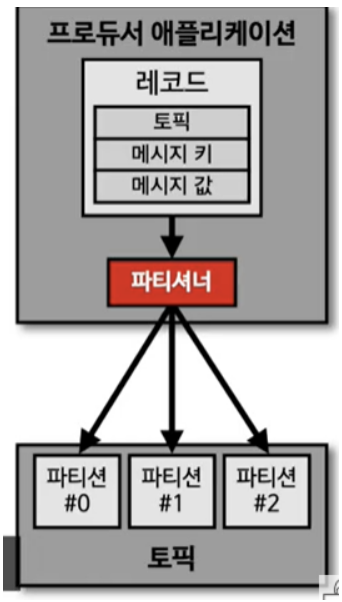

데이터를 topic의 어떤 파티션에 저장해야 할지 결정하는 프로세스

레코드에 포함된 메세지 키 또는 값에 따라 파티션의 위치 결정

파티셔너 기본값 : UniformStickyPartitioner - 메세지 키가 있을때 / 없을때 다르게 동작

유니폼 스티키 파티션은 2.4.0 부터 기본 설정으로 사용되는 파티셔너. 스티키 파티션은 라운드-로빈 파티셔너와 다르게 프로듀서 내부동작에 특화되어 있다. 특히 배치전송에 특화.

프로듀서는 파티션에 데이터를 전송하기 전에 Accumulator에 데이터를 버퍼로 쌓아 놓고 발송. 스티키 파티셔너를 사용할 경우 Accumulator의 버퍼를 채워서 보내기 때문에 성능향상에서 유리

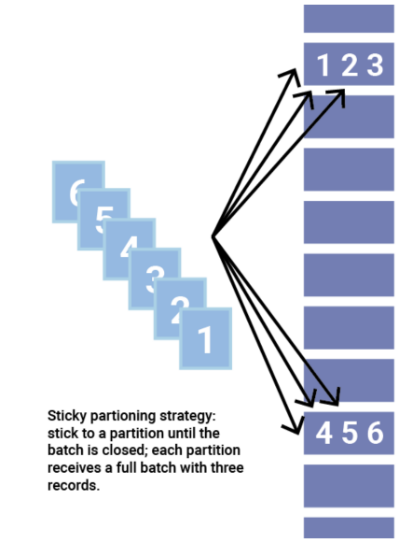

메시지 키가 없는 경우, 라운드 로빈값으로 파티션을 순회하면서 레코드를 넣으며, 파티션 갯수가 늘어날 때도 순회화며 지속적으로 데이터를 넣음

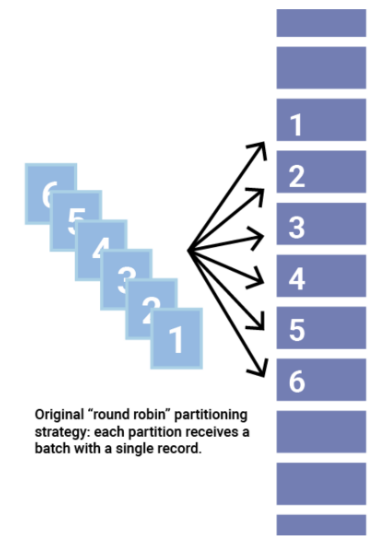

메시지 키가 있는 경우, 파티셔너에 의해 특정한 hash값을 생성 - 생성값을 기준으로 어느 파티션에 들어가야 할지 결정

동일한 메세지 키를 가진 레코드는 동일한 hash값을 만들기 때문에 동일한 파티션에 들어감을 보장 - 동일한 파티션에 순서를 지켜 메세지를 처리할 수 잇다.

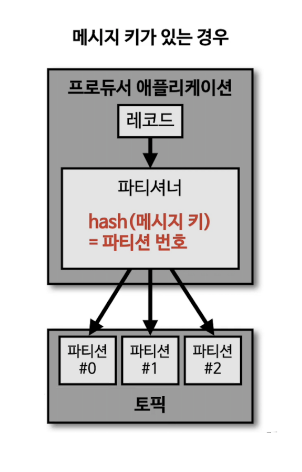

직접 개발한 파티셔너 생성가능 > 파티셔너 인터페이스 사용 

커스텀 파티셔너를 만들면 메세지 키 / 값 또는 토픽이름에 따라 어느 파티션에 데이터를 보낼 수 있을지 정할 수 있음